# TASK 6.2 EXPLORING RELATIONSHIPS

**THIS SCRIPT CONTAINS THE FOLLOWING SECTIONS**

1. Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous      Exercise
 
2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis. For instance, discard “ID,” “date,” and “index” variables.
    
3. Create a correlation matrix heatmap (colored). Discuss what the coefficients in the plot mean in terms of the relationships between the variables.
   
4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.

5. Create a pair plot of the entire data set.  Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

6. Create a categorical plot and interpret the results

7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

8. Define any hypotheses that you can at this point. You’ll be testing these later on.

9. Export df with new variables.

10. Export f_heatmap

**1. Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#define path
path = r'C:\Users\ddgal\OneDrive\Desktop\Career Foundry Tasks\Data Immersion\Achievement 6'

In [3]:
#import cleaned dataset as df
df= pd.read_csv(os.path.join(path, 'Prepared Data', 'cust_churn_records_clean.csv'), index_col=0)

In [4]:
#check shape
df.shape

(10000, 16)

In [5]:
#check columns
df.columns

Index(['Customer_id', 'Credit_score', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Number_of_products', 'Has_credit_card', 'Is_active_member',
       'Estimated_salary', 'Exited', 'Complain', 'Satisfaction_score',
       'Card_type', 'Points_earned'],
      dtype='object')

In [6]:
#check first 5 rows
df.head()

,Customer_id,Credit_score,Geography,Gender,Age,Tenure,Balance,Number_of_products,Has_credit_card,Is_active_member,Estimated_salary,Exited,Complain,Satisfaction_score,Card_type,Points_earned
RowNumber,,,,,,,,,,,,,,,,
1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


All checks are clear

**2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis. For instance, discard “ID,” “date,” and “index” variables.**

In [7]:
#create subset of df which removes columns unsuitable for visual analysis
df_sub = df[['Credit_score', 'Age', 'Tenure', 'Balance', 'Number_of_products', 'Has_credit_card', 'Is_active_member',
            'Estimated_salary', 'Exited', 'Complain', 'Satisfaction_score', 'Points_earned']]
df_sub.head()

,Credit_score,Age,Tenure,Balance,Number_of_products,Has_credit_card,Is_active_member,Estimated_salary,Exited,Complain,Satisfaction_score,Points_earned
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
2,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
3,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
4,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
5,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


**3. Create a correlation matrix heatmap (colored). Discuss what the coefficients in the plot mean in terms of the relationships between the variables.**

In [8]:
#create correlation matrix using pandas
df_sub.corr()

,Credit_score,Age,Tenure,Balance,Number_of_products,Has_credit_card,Is_active_member,Estimated_salary,Exited,Complain,Satisfaction_score,Points_earned
Credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
Number_of_products,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
Has_credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
Is_active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
Estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628
Complain,-0.027048,0.283530,-0.013047,0.119124,-0.046357,-0.007095,-0.154741,0.012494,0.995693,1.000000,-0.004799,-0.002893


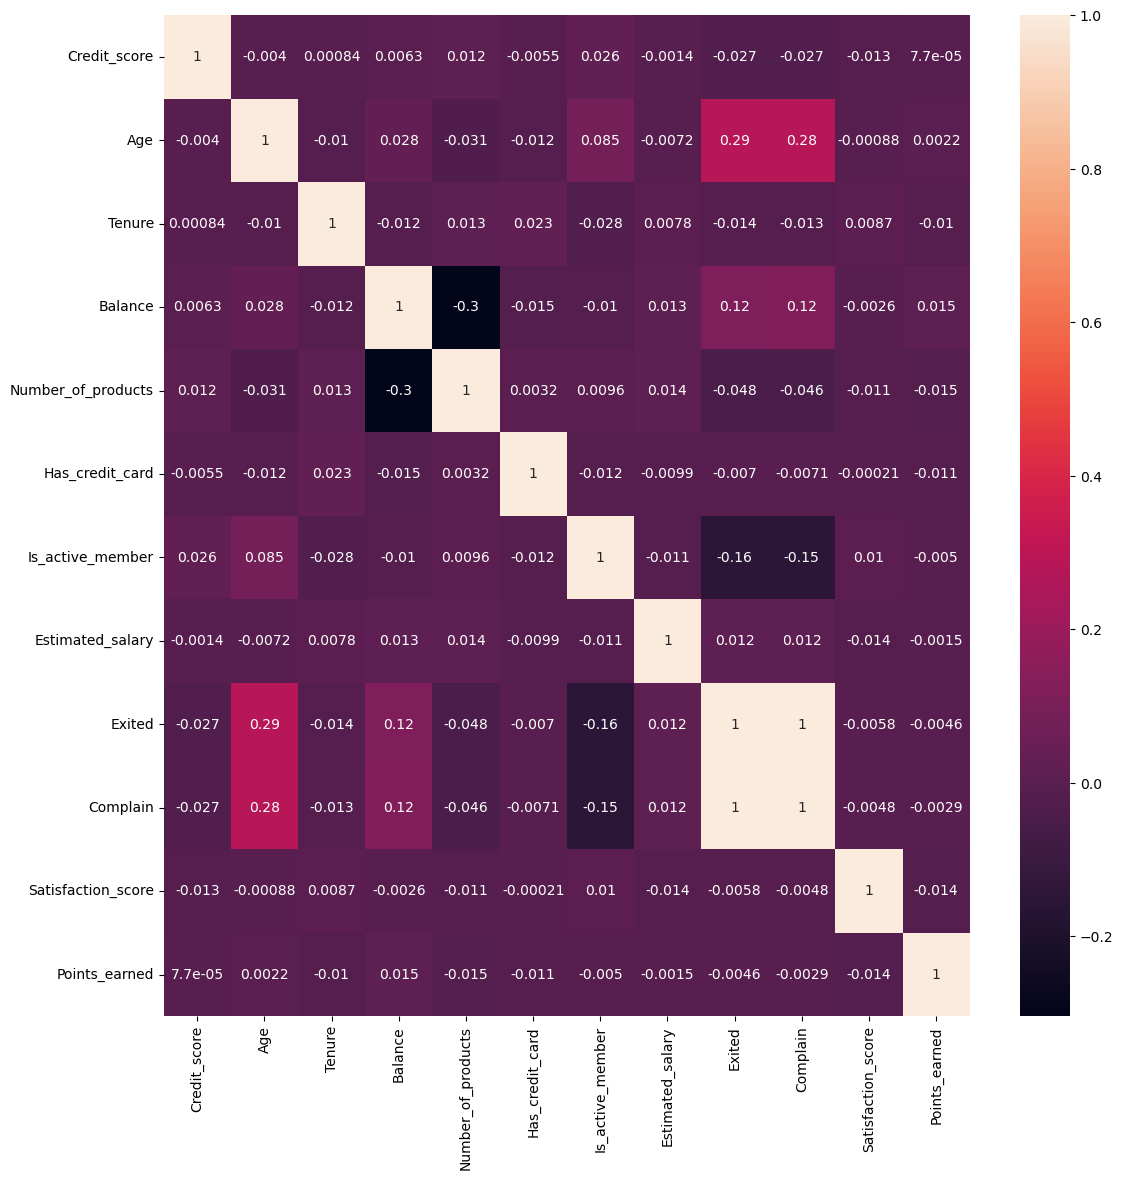

In [9]:
#create figure titled f_heatmap and a set of subplots using subplot library
f_heatmap, ax = plt.subplots(figsize=(13,13))

#creates heatmap titled corr using seaborn library, the annot=true adds numerical annotation, the ax=ax specifies the 
#subplot(ax) to be drawn; using the ax from the previous line
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

So in this heatmap, a black (-0.3)signifies a weak negative relationship and a beige color (+1.0) indicates a strong positive relationship.  I have noted the following things from the heatmap:

1. There is a strong positive correlation between Exited and Complain(+1.0).  This leads me to believe that people who complain are more likely to leave the bank.

2. There is a weak positive correlation between Exited and Age (+0.29) as well as complain and age (+0.29).  So the older the  clients are, the more likely they are to leave the bank. 

3. There is a weak negative relationship between Balance and Number_of_products (-0.3).  This would indicate the lower the balance somebody has, the more likely they will leave the bank.

4. There is a weak positive correlation between Exited and Balance (+0.12) as well as Complain and Balance.  This means the higher somebody's balance is, the more likely they will leave the bank.

5.  There is a weak negative relationship between Exited and Is_active_member (-0.16).  This means if somebody is not an active member, they are more likely to leave the bank. 

**4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.**

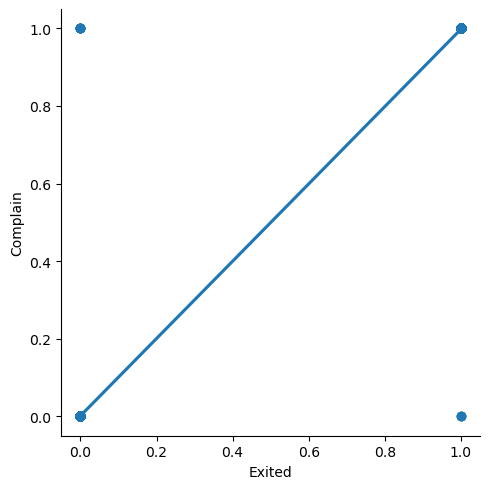

In [10]:
#create scatterplot between Exited and Complain columns 
sns.lmplot(x = 'Exited', y = 'Complain', data = df)

The scatter plot confirms the strong relationship between Exited and Complain.

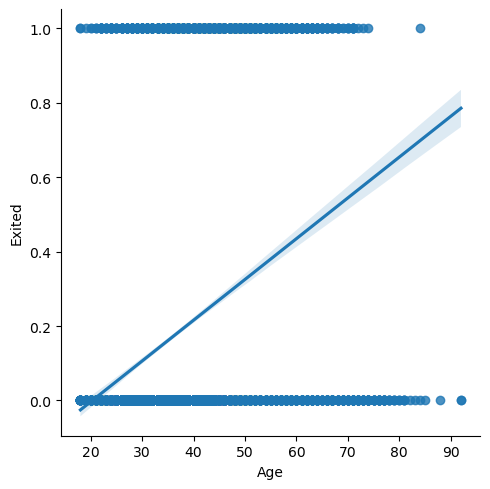

In [11]:
#create scatterplot between Exited and Age
sns.lmplot(x = 'Age', y = 'Exited', data = df)

From the scatterplot it would seem, that people over 75 do not leave the bank very often.

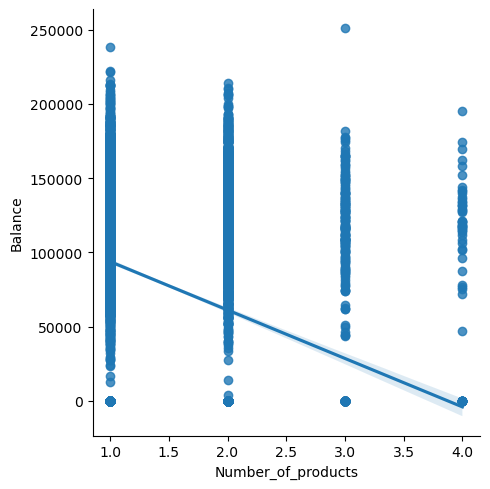

In [12]:
#create scatterplot of Number_of_products and Balance
sns.lmplot(x = 'Number_of_products', y = 'Balance', data = df)

This scatterplot does not tell me much, other than the line being on a negative slope. I can tell that there the people with 4 products mostly have a balance between 75,000 to 175000.

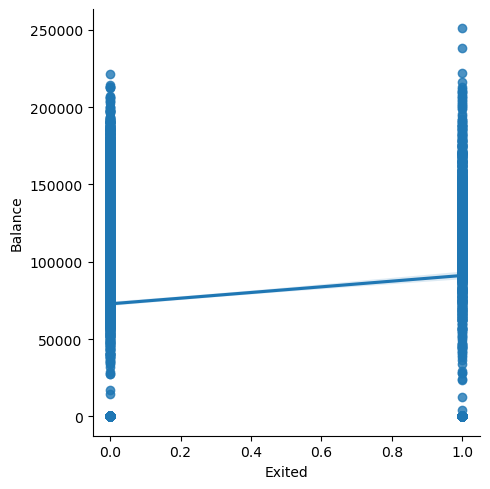

In [13]:
#create scatterplot of Exited and Balance
sns.lmplot(x = 'Exited', y = 'Balance', data = df)

This scatterplot does not tell me much, other than the line being on a positive slope.

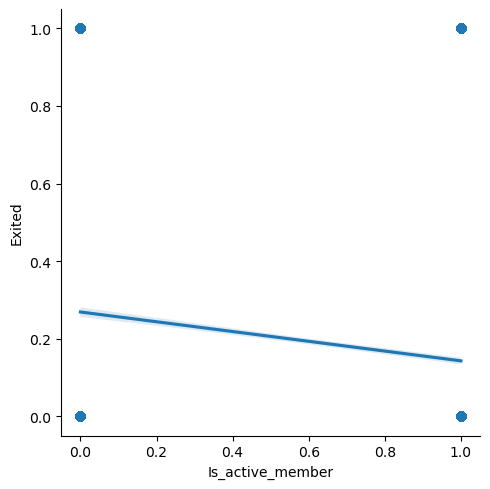

In [14]:
#create scatterplot of Exited and Is_active_member
sns.lmplot(x = 'Is_active_member', y = 'Exited', data = df)

This scatterplot does not tell me much, other than the line being on a negative slope.

**5. Create a pair plot of the entire data set. Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.**

In [15]:
#create second subset for pair plot, eliminating the 1 and 0 variables
df_sub_2 = df[['Credit_score', 'Age', 'Tenure', 'Balance', 'Number_of_products', 'Estimated_salary', 'Points_earned']]

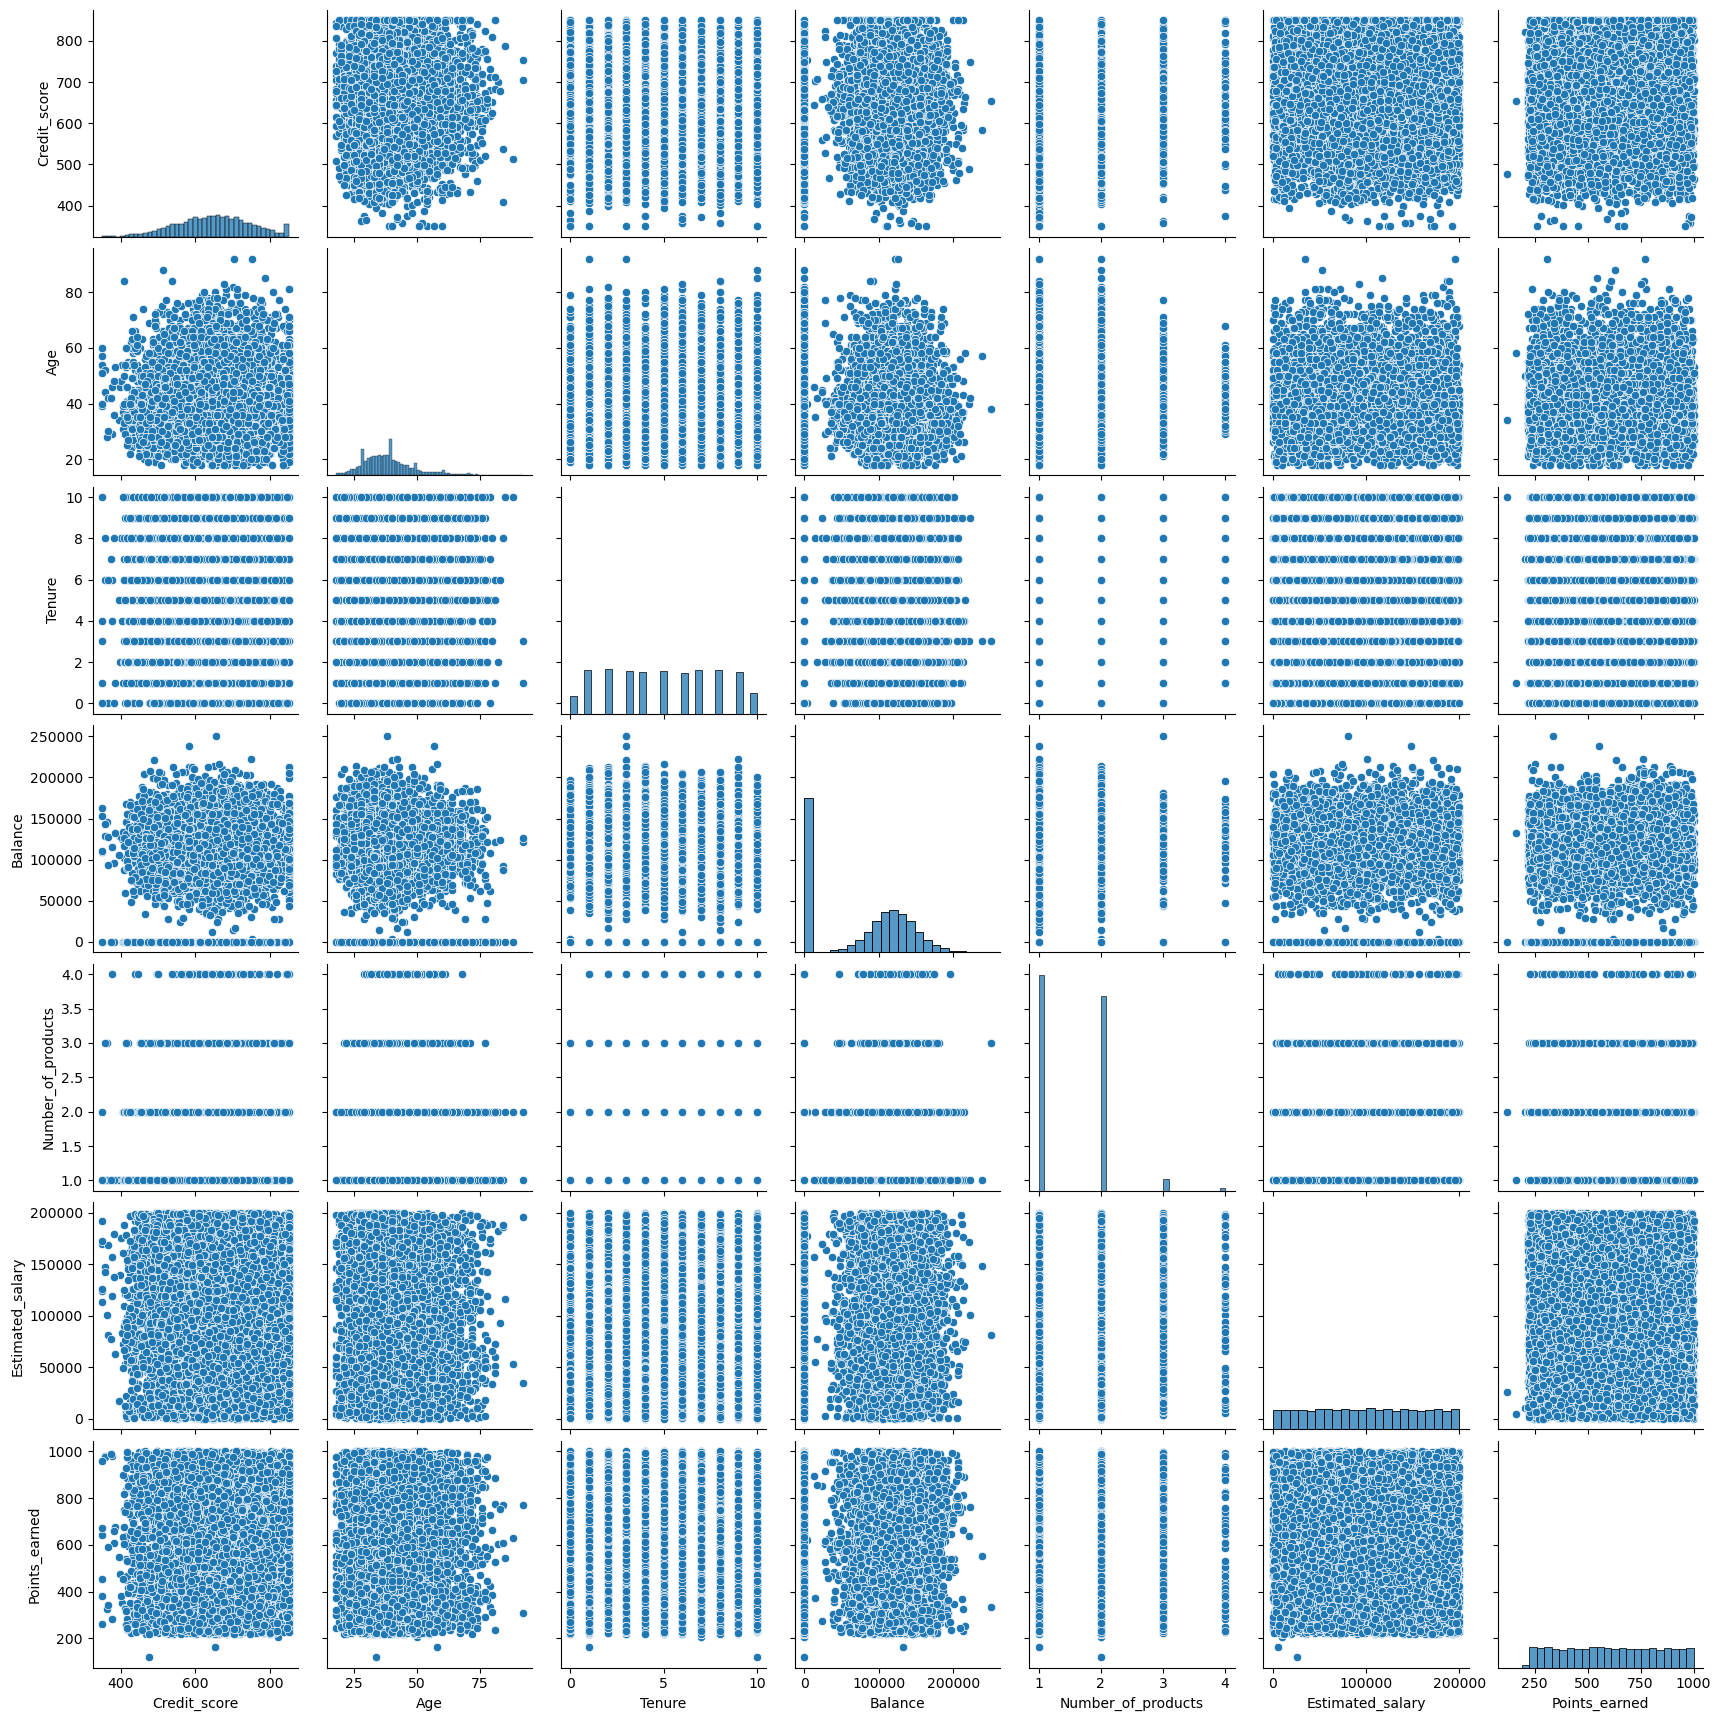

In [16]:
# Create a pair plot with df_sub_2
pp = sns.pairplot(df_sub_2)

I would like to further explore the Credit_score, Age, Tenure, Balance, Estimated_salary, and Points_earned because these are categorical variables and can be divided into categories to make it easier to derive useful insights.  For example, low credit score, medium credit score, and hight credit score.  This will make it easier to pin point exactly who is more likely to leave the bank.

**6. Create a categorical plot and interpret the results.**

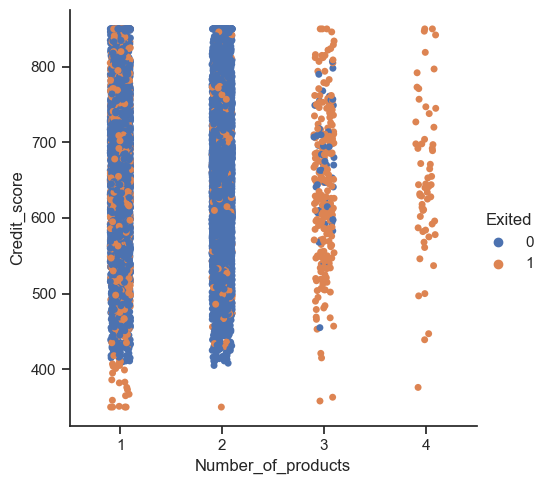

In [17]:
#create a categorical plot in seaborn
sns.set(style="ticks")
g = sns.catplot(x='Number_of_products', y='Credit_score', hue='Exited', data=df)

From the above catplot we can say with certainty that a large number of customers with 3 or 4 products and credit scores above 450 left the bank.  We can also ascertain that a large number of customers with 1 or 2 products and credit scores above 400 credit score stayed with the bank. 

**7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.**

<span style='background-color:cyan'>**Question: Is low credit score a factor for people leaving the bank?**</span>

<Axes: xlabel='Credit_score', ylabel='Count'>

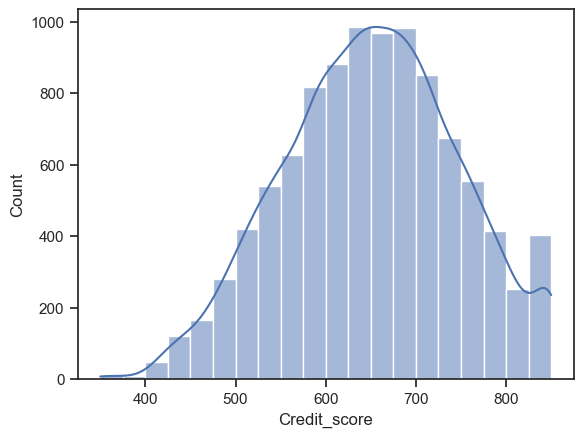

In [18]:
#create histogram from Credit_score
sns.histplot(df['Credit_score'], bins = 20, kde=True)

In [19]:
#create conditions for Credit_profile
pr_credit = []
for score in df['Credit_score']:
    if score <= 575 :
        pr_credit.append('Poor credit score')
    elif score > 575 and  score <= 725:
        pr_credit.append('Fair credit score')
    else:
        pr_credit.append('Excellent credit score')

#create new column Credit_profile from pr_credit
df['Credit_profile'] = pr_credit

In [20]:
#check values of Credit_profile
df['Credit_profile'].value_counts(dropna=False)

Fair credit score         5488
Excellent credit score    2270
Poor credit score         2242
Name: Credit_profile, dtype: int64

In [21]:
5488+2270+2242

10000

Credit_profile executed successfully since the value counts added together equals the number of Rows.

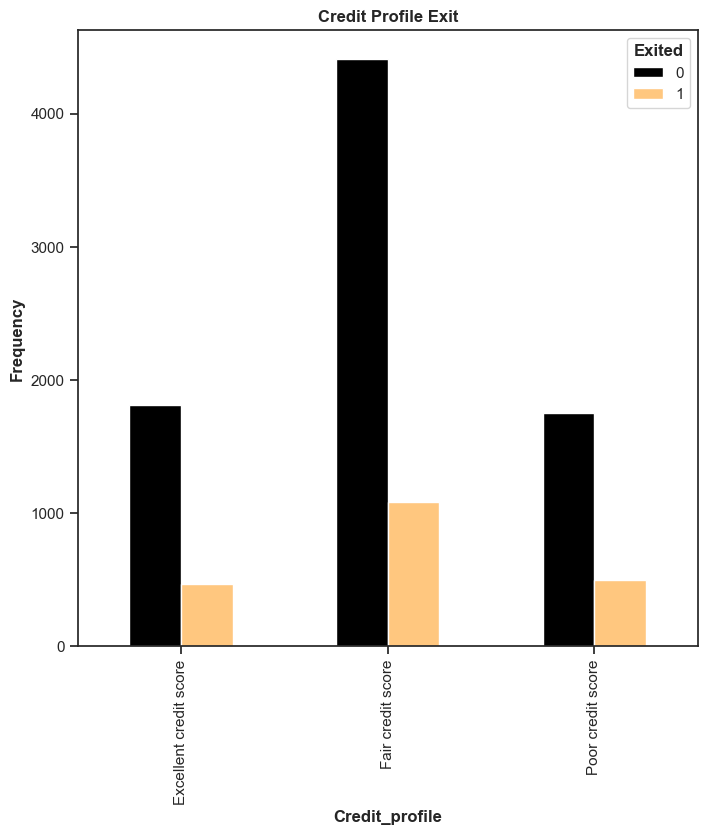

In [22]:
#create table_credit which counts how many people have exited from the credit_profile
table_credit = df[['Credit_profile', 'Exited']].value_counts(dropna = False).sort_index()

#create bar chart from table_credit
bar_credit = table_credit.unstack().plot(kind='bar', colormap='copper', figsize=(8, 8)) #creates stacked bar chart
sns.set_style('ticks')
plt.xlabel('Credit_profile', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Credit Profile Exit', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Exited')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.show()

<span style='background-color:orange'>**Answer: Poor credit score does not seem to be a factor for customer churn, as almost the same amount of people with excellent credit score have left the bank.  More people with Fair credit score have left the bank.**<span>

<span style='background-color:cyan'>**Question: Does geography have anything to do with customer churn?**<span>

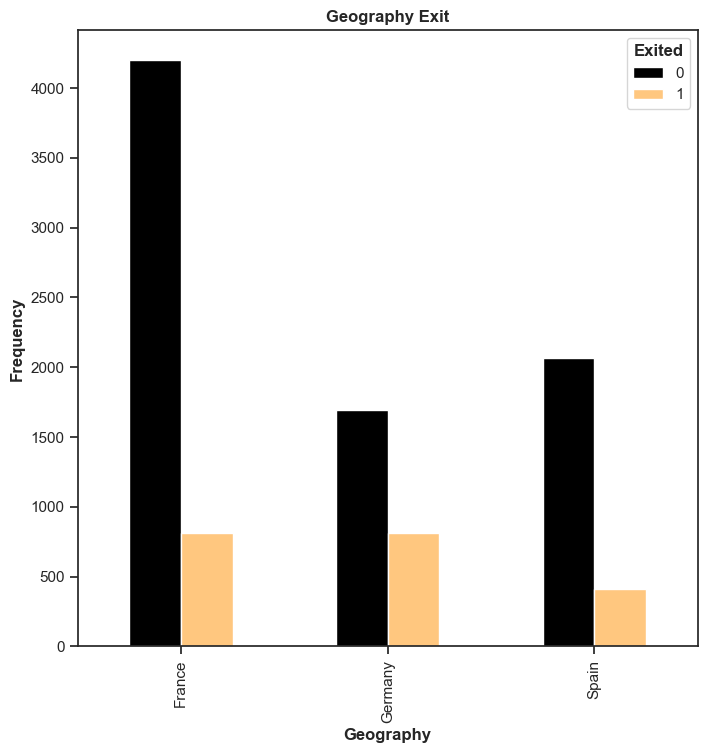

In [23]:
#create table_geography that counts how many exited from each country
table_geography = df[['Geography', 'Exited']].value_counts(dropna = False).sort_index()

#create bar chart from table_credit
bar_geography = table_geography.unstack().plot(kind='bar', colormap='copper', figsize=(8, 8)) #creates stacked bar chart
sns.set_style('ticks')
plt.xlabel('Geography', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Geography Exit', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Exited')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.show()


<span style='background-color:orange'>**Answer: Geography is not a factor in customer churn.  France and Germany have about the same number of people who have left the bank, with Spain being slightly less.**<span>

<span style='background-color:cyan'>**Question: Does age group and/or gender have anything to do with customer churn?**<span>

<Axes: xlabel='Age', ylabel='Count'>

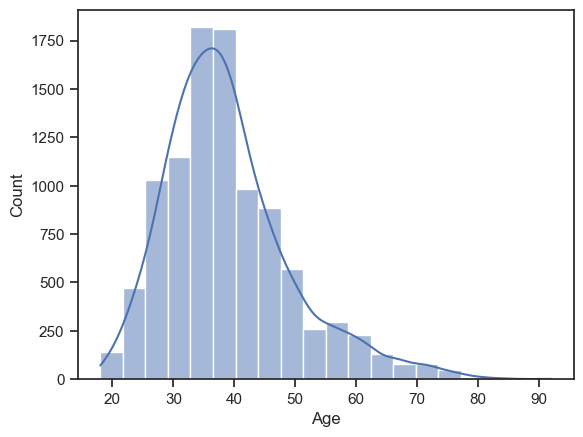

In [24]:
#create histogram from Age
sns.histplot(df['Age'], bins = 20, kde=True)

<span style='background-color:cyan'>**Question: Does age group and/or gender have anything to do with customer churn?**<span>

In [25]:
#create conditions for Age_profile 
pr_age = []
for age in df['Age']:
    if age >= 18 and age < 40:
        pr_age.append('Young adult')
    elif age >= 40 and  age < 65:
        pr_age.append('Middle aged')
    else:
        pr_age.append('Senior')

#create new column Age_profile column from pr_age
df['Age_profile'] = pr_age

In [26]:
#check values of Age_profile
df['Age_profile'].value_counts(dropna=False)

Young adult    5987
Middle aged    3731
Senior          282
Name: Age_profile, dtype: int64

In [27]:
5987+3731+282

10000

Age_profile executed successfully since the value counts added together equals the number of Rows.

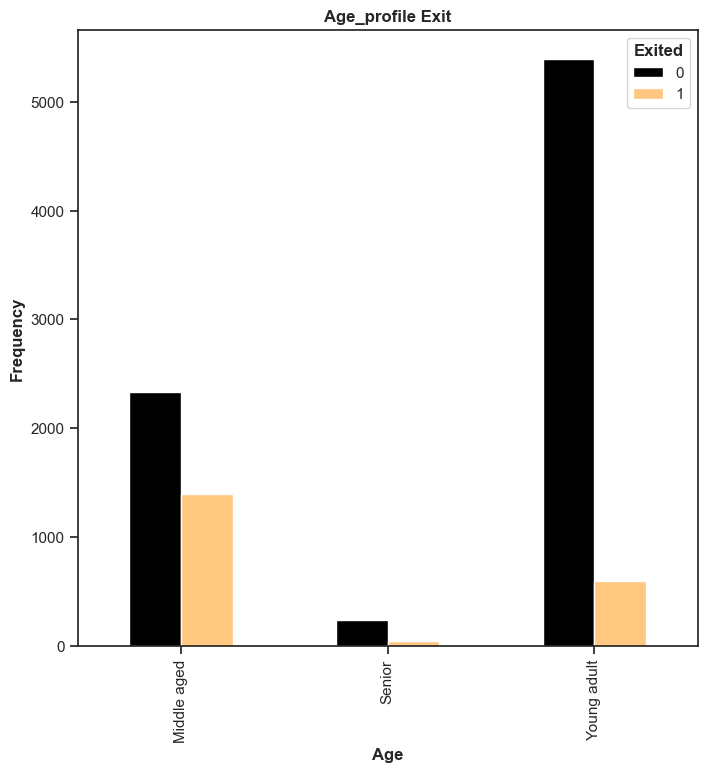

In [28]:
#create table_age that counts how many exited from each country
table_age = df[['Age_profile', 'Exited']].value_counts(dropna = False).sort_index()

#create bar chart from table_credit
bar_age = table_age.unstack().plot(kind='bar', colormap='copper', figsize=(8, 8)) #creates stacked bar chart
sns.set_style('ticks')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Age_profile Exit', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Exited')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.show()

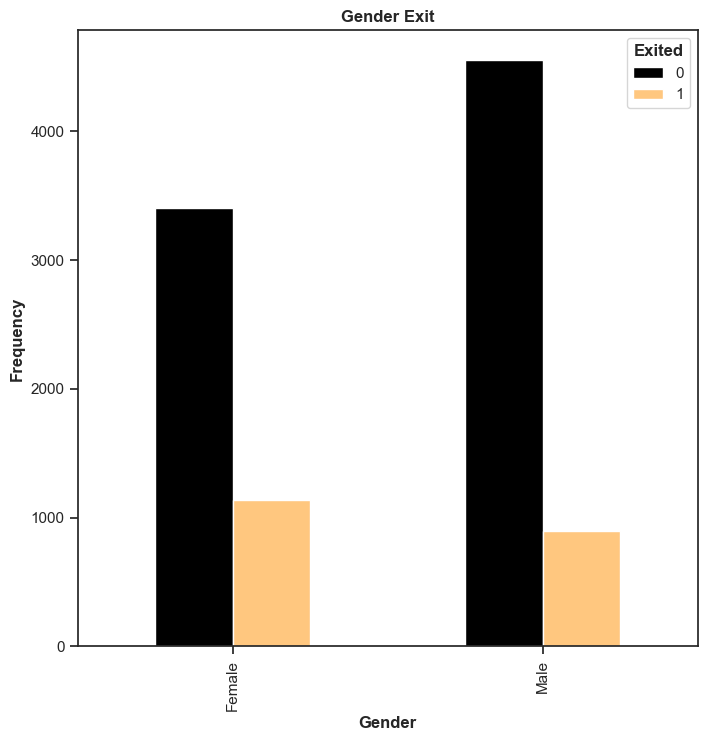

In [29]:
#create table_age that counts how many exited from each country
table_gender = df[['Gender', 'Exited']].value_counts(dropna = False).sort_index()

#create bar chart from table_credit
gender_bar = table_gender.unstack().plot(kind='bar', colormap='copper', figsize=(8, 8)) #creates stacked bar chart
sns.set_style('ticks')
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Gender Exit', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Exited')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.show()

<span style='background-color:orange'>**Answer: Gender does not affect customer churn, as almost the same amount of male and female customers have left the bank.  In addition, middle aged and young adults are much more likely to leave the bank than seniors.**<span>

<span style='background-color:cyan'>**Question: Do customers with a low account balance have a greater likelihood of leaving the bank?**<span>

<Axes: xlabel='Balance', ylabel='Count'>

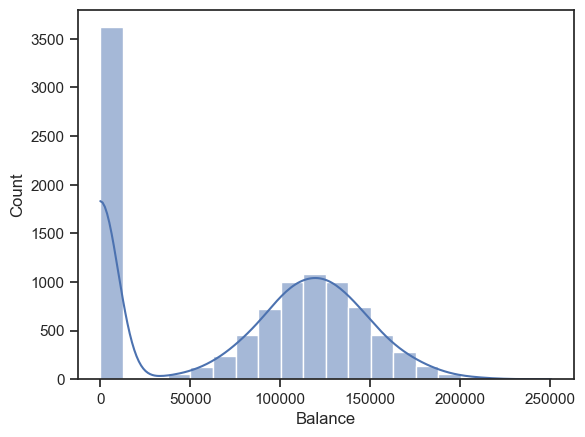

In [30]:
#create histograom from Balance
sns.histplot(df['Balance'], bins = 20, kde=True)

In [31]:
#create conditions for Balance_profile 
pr_balance = []
for balance in df['Balance']:
    if balance == 0:
        pr_balance.append('No balance')
    elif balance > 0 and  balance <= 87500:
        pr_balance.append('Low balance')
    elif balance > 87500 and balance <= 150000:
        pr_balance.append('Medium balance')
    else:
        pr_balance.append('High balance')

#create new column Balance_profile column from pr_balance
df['Balance_profile'] = pr_balance

In [32]:
#check value counts of Balance_profile
df['Balance_profile'].value_counts(dropna=False)

Medium balance    4538
No balance        3617
High balance       969
Low balance        876
Name: Balance_profile, dtype: int64

In [33]:
4538+3617+969+876

10000

Balance_profile executed successfully since the value counts added together equals the number of Rows.

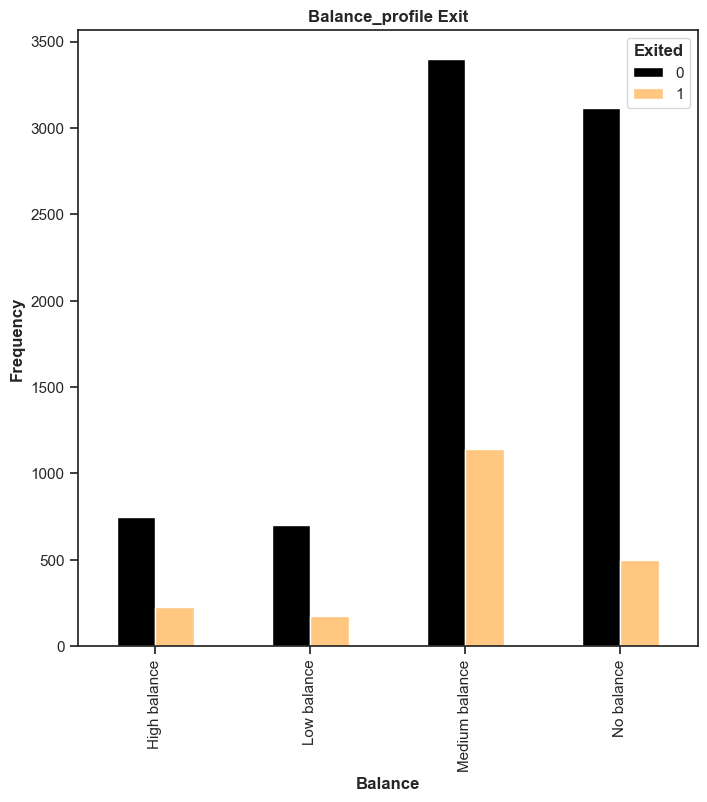

In [34]:
#create table_age that counts how many exited from each country
table_balance = df[['Balance_profile', 'Exited']].value_counts(dropna = False).sort_index()

#create bar chart from table_credit
balance_bar = table_balance.unstack().plot(kind='bar', colormap='copper', figsize=(8, 8)) #creates stacked bar chart
sns.set_style('ticks')
plt.xlabel('Balance', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Balance_profile Exit', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Exited')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.show()

<span style='background-color:orange'>**Answer: Medium balance and No balance customers have left the bank much more often than the other two categories.**<span>

<span style='background-color:cyan'>**Question: Are customers with low tenure more likely to leave the bank?**<span>

<Axes: xlabel='Tenure', ylabel='Count'>

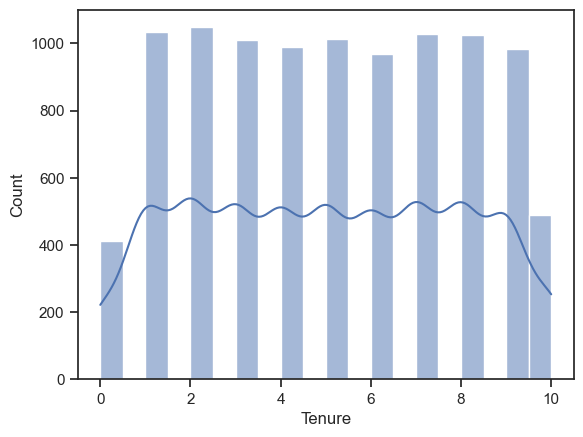

In [35]:
#create histograom from Tenure
sns.histplot(df['Tenure'], bins = 20, kde=True)

In [36]:
#create conditions for Tenure_profile 
pr_tenure = []
for tenure in df['Tenure']:
    if tenure <= 2:
        pr_tenure.append('Low Tenure')
    elif tenure > 2 and tenure <= 7:
        pr_tenure.append('Medium Tenure')
    else:
        pr_tenure.append('High Tenure')

#create new column Tenure_profile column from pr_tenure
df['Tenure_profile'] = pr_tenure

In [37]:
#check valuecounts of Tenure_profile
df['Tenure_profile'].value_counts(dropna=False)

Medium Tenure    5005
High Tenure      2499
Low Tenure       2496
Name: Tenure_profile, dtype: int64

In [38]:
5005+2499+2496

10000

Tenure_profile executed successfully since the value counts added together equals the number of Rows.

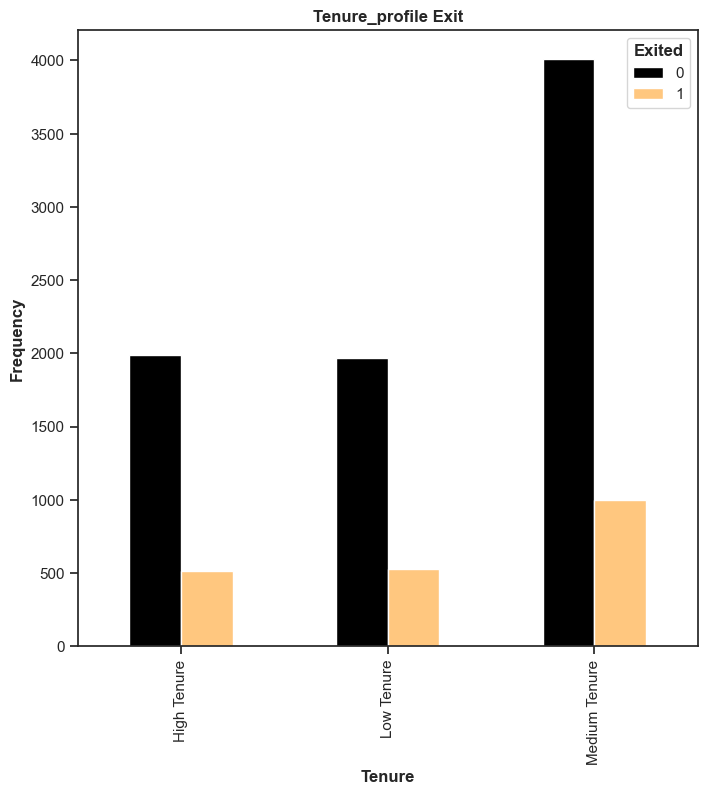

In [39]:
#create table_age that counts how many exited from each country
table_tenure = df[['Tenure_profile', 'Exited']].value_counts(dropna = False).sort_index()

#create bar chart from table_credit
tenure_bar = table_tenure.unstack().plot(kind='bar', colormap='copper', figsize=(8, 8)) #creates stacked bar chart
sns.set_style('ticks')
plt.xlabel('Tenure', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Tenure_profile Exit', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Exited')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.show()

<span style='background-color:orange'>**Answer: Customers with high and low tenure leave the bank at the same frequency whereas medium tenure customers leave more often.**<span>

<span style='background-color:cyan'>**Question: Are high-income individuals more likely to stay with the bank?**<span>

<Axes: xlabel='Estimated_salary', ylabel='Count'>

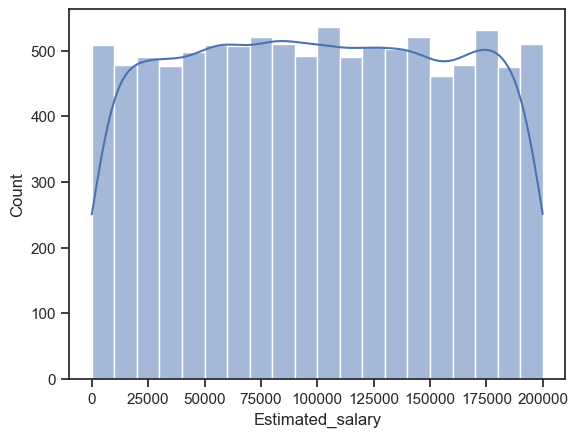

In [40]:
#create histograom from Estimated_salary
sns.histplot(df['Estimated_salary'], bins = 20, kde=True)

In [41]:
#create conditions for Estimated_salary_profile
pr_salary = []
for salary in df['Estimated_salary']:
    if salary < 60000:
        pr_salary.append('Lower class')
    elif salary >= 60000 and salary < 150000:
        pr_salary.append('Middle class')
    else:
        pr_salary.append('Upper class')

#create new column Salary_profile column from pr_salary
df['Salary_profile'] = pr_salary  

In [42]:
#check valuecounts for Salary_profile
df['Salary_profile'].value_counts(dropna=False)

Middle class    4584
Lower class     2961
Upper class     2455
Name: Salary_profile, dtype: int64

In [43]:
4584+2961+2455

10000

Salary_profile executed successfully since the value counts added together equals the number of Rows.

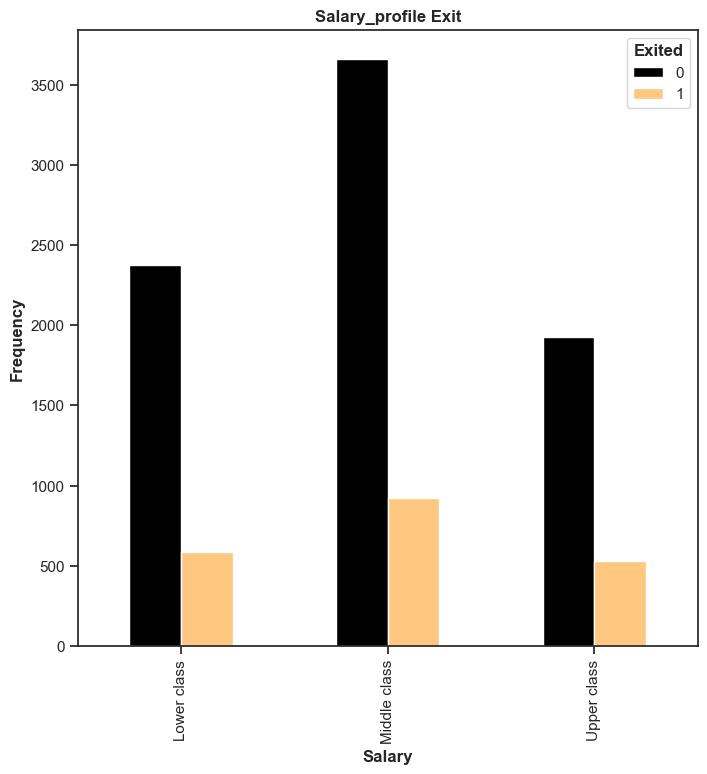

In [44]:
#create table_age that counts how many exited from each country
table_salary = df[['Salary_profile', 'Exited']].value_counts(dropna = False).sort_index()

#create bar chart from table_credit
points_salary = table_salary.unstack().plot(kind='bar', colormap='copper', figsize=(8, 8)) #creates stacked bar chart
sns.set_style('ticks')
plt.xlabel('Salary', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Salary_profile Exit', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Exited')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.show()

<span style='background-color:orange'>**Answer: Upper class customers are just as likely as lower class customers to leave the bank.  Middle class are the ones that leave the bank the most.**<span>

<span style='background-color:cyan'>**Question: Does the more points a customer has, affect the likelihood of them staying?**<span>

<Axes: xlabel='Points_earned', ylabel='Count'>

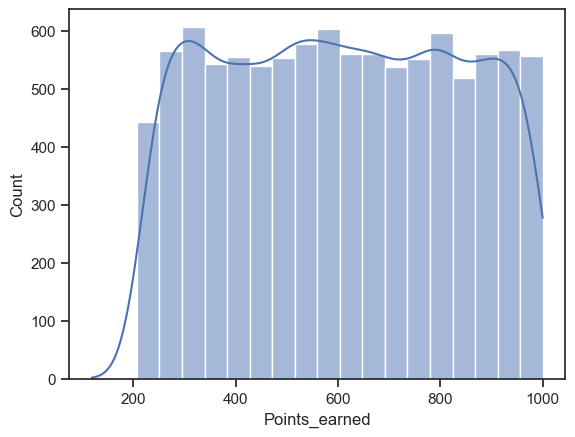

In [45]:
#create histograom from Points_earned
sns.histplot(df['Points_earned'], bins = 20, kde=True)

In [46]:
pr_points = []
for points in df['Points_earned']:
    if points <= 400:
        pr_points.append('Low points')
    elif points > 400 and points <= 800:
        pr_points.append('Middle points')
    else:
        pr_points.append('High points')

#create new column Salary_profile column from pr_salary
df['Points_profile'] = pr_points

In [47]:
#check value counts of Points_profile
df['Points_profile'].value_counts(dropna=False)

Middle points    5142
High points      2501
Low points       2357
Name: Points_profile, dtype: int64

In [48]:
5142+2501+2357

10000

Points_profile executed successfully since the value counts added together equals the number of Rows.

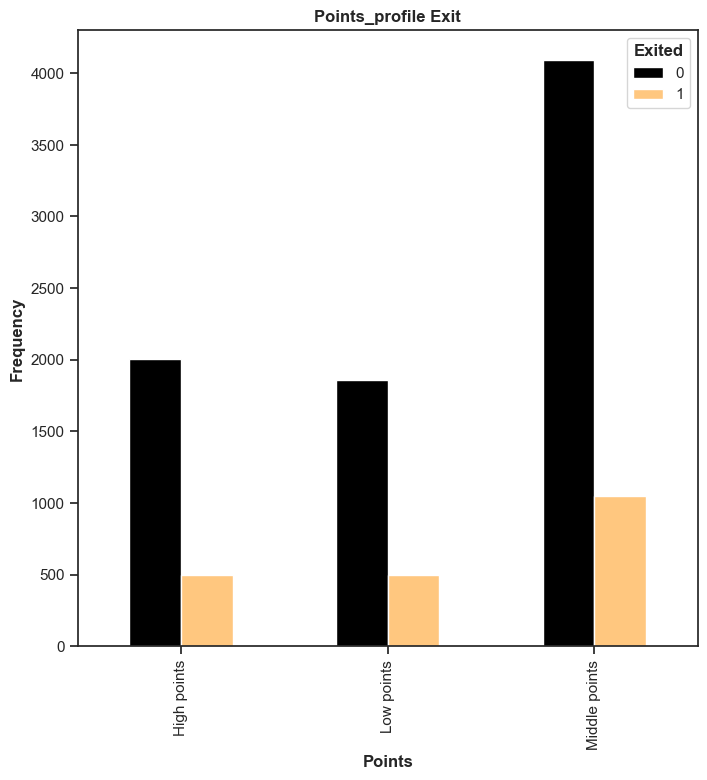

In [49]:
#create table_age that counts how many exited from each country
table_points = df[['Points_profile', 'Exited']].value_counts(dropna = False).sort_index()

#create bar chart from table_credit
points_bar = table_points.unstack().plot(kind='bar', colormap='copper', figsize=(8, 8)) #creates stacked bar chart
sns.set_style('ticks')
plt.xlabel('Points', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Points_profile Exit', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Exited')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.show()

<span style='background-color:orange'>**Answer: Customers with middle points leave the bank more often than high or low point customers.**<span>

<span style='background-color:cyan'>**Question: Are inactive members more likely to leave the bank?**<span>

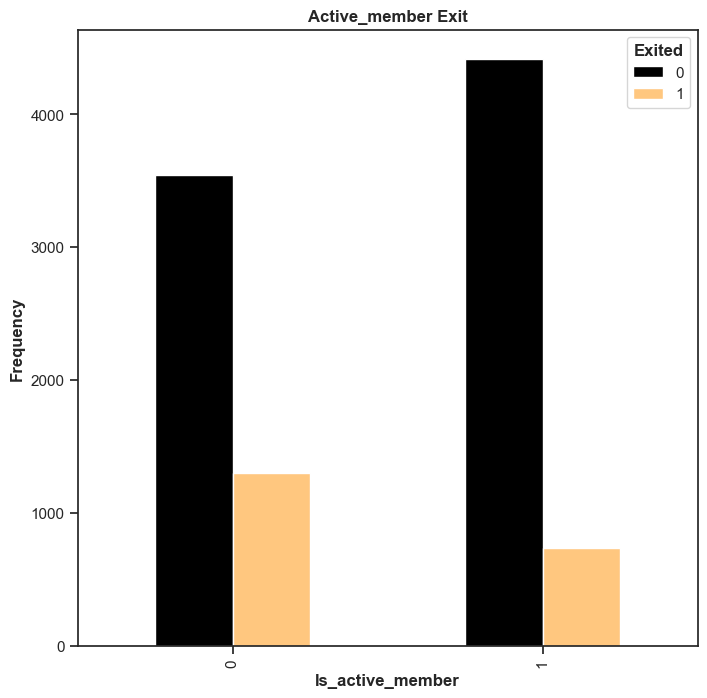

In [50]:
#create table_age that counts how many exited from each country
table_active = df[['Is_active_member', 'Exited']].value_counts(dropna = False).sort_index()

#create bar chart from table_credit
active_bar = table_active.unstack().plot(kind='bar', colormap='copper', figsize=(8, 8)) #creates stacked bar chart
sns.set_style('ticks')
plt.xlabel('Is_active_member', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Active_member Exit', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Exited')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.show()

<span style='background-color:orange'>**Answer: Inactive members are more likely to leave the bank.**<span>

<span style='background-color:cyan'>**Question: Are customers who complain more likely to be unsatisfied and leave the bank?**<span>

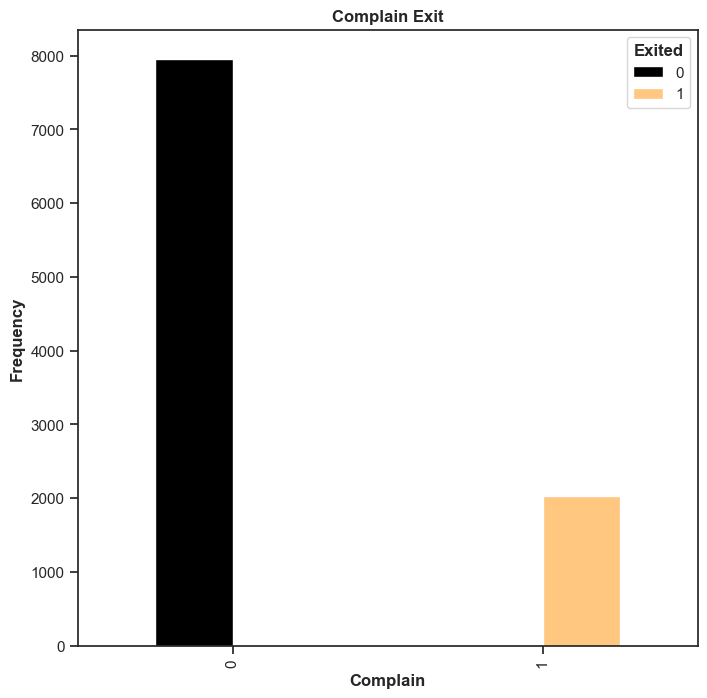

In [51]:
#create table_age that counts how many exited from each country
table_complain = df[['Complain', 'Exited']].value_counts(dropna = False).sort_index()

#create bar chart from table_credit
complain_bar = table_complain.unstack().plot(kind='bar', colormap='copper', figsize=(8, 8)) #creates stacked bar chart
sns.set_style('ticks')
plt.xlabel('Complain', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Complain Exit', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Exited')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.show()

<span style='background-color:orange'>**Answer: This is the strongest relationship we see yet, everyone who has a complaint has left the bank and everyone who did not complain stayed with the bank.  This could be a strong indicator that the bank needs to fix its customer service.**<span>

**New questions to consider:**
    
    1. Who complains the most? 
    2. Are less satisfied customers more likely to complain and leave?
    3. Does the type of credit card a customer has affect the churn rate?

**8. Define any hypotheses that you can at this point. You’ll be testing these later on.**

HYPOTHESIS: A CUSTOMER WILL LEAVE THE BANK IF THEY HAVE A COMPLAINT.

NULL HYPOTHESIS: A CUSTOMER WILL NOT LEAVE THE BANK IF THEY HAVE A COMPLAINT.

**9. Export df with new variables.**

In [52]:
#check new shape with added columns(16+6 = 22)
df.shape

(10000, 22)

In [53]:
#check table
df.columns

Index(['Customer_id', 'Credit_score', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Number_of_products', 'Has_credit_card', 'Is_active_member',
       'Estimated_salary', 'Exited', 'Complain', 'Satisfaction_score',
       'Card_type', 'Points_earned', 'Credit_profile', 'Age_profile',
       'Balance_profile', 'Tenure_profile', 'Salary_profile',
       'Points_profile'],
      dtype='object')

In [54]:
#export df with new variables
df.to_csv(os.path.join(path, 'Prepared Data', 'cust_churn_records_var.csv'))

**10. Export f_heatmap**

In [55]:
#export f_heatmap
f_heatmap.figure.savefig(os.path.join(path, 'Visualizations', 'heatmap.png'))